In [14]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
import csv
import pandas as pd
from sklearn.model_selection import GridSearchCV
from IPython.display import Markdown
from tensorflow import keras
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit
from time import time
from sklearn.preprocessing import normalize
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

In [9]:
feature_vectors = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None)
labels = pd.read_csv('galaxy_label_data_set.csv', delimiter = ',')
X_galaxy = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None).values[:,0:-1]
Y_galaxy = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None).values[:,-1:].astype(int).flatten()
Xg_train, Xg_test, Yg_train, Yg_test = train_test_split(X_galaxy, Y_galaxy, test_size=0.20, random_state=42, stratify=Y_galaxy)

# On normalise nos features
scaler = StandardScaler()
Xg_train = scaler.fit_transform(Xg_train)
Xg_test = scaler.fit_transform(Xg_test)

In [10]:
# Création d'array pour stocker l'accuracy et le score f1 pour les différents nombres d'itération
accuracies = []
f1_scores = []


In [39]:
accuracies_npercep = []
f1_scores_npercep = []

In [68]:
accuracies_layers = []
f1_scores_layers = []
accuracies_learning = []
f1_scores_learning = []

In [105]:
"""
# Parameters
learning_rate = 0.0005
n_epochs = 60
batch = 100

# Network Parameters
n_hidden_1 = 100 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_hidden_3 = 50 # 3rd layer number of neurons
n_hidden_4 = 2 # 3rd layer number of neurons
num_input = 75
num_classes = 2
"""
batch = 100

learning_rate = 0.0005
n_epochs = 60
n_hidden_1 = 100 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_hidden_3 = 50 # 3rd layer number of neurons
n_hidden_4 = 2 # 4th layer number of neurons
num_input = 75
num_classes = 2


In [111]:
# nombre d’itérations (epochs)
#n_epochs = 400
learning_rate = 3


In [112]:
model = keras.Sequential()
model.add(layers.Dense(n_hidden_1))
model.add(layers.Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(layers.Dense(n_hidden_2))
model.add(layers.Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(layers.Dense(num_classes, activation='softmax'))



model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [113]:
tensorboard = keras.callbacks.TensorBoard(log_dir='no_dropout/learning_3', batch_size=batch, histogram_freq=0, write_graph=True, write_images=True)

model.fit(Xg_train, Yg_train, epochs=n_epochs, batch_size=batch, validation_data=(Xg_test, Yg_test),
          callbacks=[tensorboard])


"""
tensorboard --logdir path_to_current_dir/Graph 
"""



Train on 13526 samples, validate on 3382 samples
Epoch 1/60
13526/13526 [==============================] - 2s 172us/step - loss: 0.5395 - acc: 0.8961 - val_loss: 0.1539 - val_acc: 0.9456
Epoch 2/60
13526/13526 [==============================] - 2s 123us/step - loss: 0.1512 - acc: 0.9444 - val_loss: 0.1516 - val_acc: 0.9435
Epoch 3/60
13526/13526 [==============================] - 2s 116us/step - loss: 0.1425 - acc: 0.9453 - val_loss: 0.1473 - val_acc: 0.9453
Epoch 4/60
13526/13526 [==============================] - 2s 120us/step - loss: 0.1316 - acc: 0.9499 - val_loss: 0.1222 - val_acc: 0.9551
Epoch 5/60
13526/13526 [==============================] - 2s 120us/step - loss: 0.1257 - acc: 0.9518 - val_loss: 0.9328 - val_acc: 0.5724
Epoch 6/60
13526/13526 [==============================] - 2s 127us/step - loss: 0.1546 - acc: 0.9446 - val_loss: 0.1810 - val_acc: 0.9293
Epoch 7/60
13526/13526 [==============================] - 2s 122us/step - loss: 0.1133 - acc: 0.9582 - val_loss: 0.1603 - v

13526/13526 [==============================] - 2s 127us/step - loss: 0.0555 - acc: 0.9795 - val_loss: 0.1835 - val_acc: 0.9548
Epoch 60/60
13526/13526 [==============================] - 2s 137us/step - loss: 0.0661 - acc: 0.9752 - val_loss: 0.3223 - val_acc: 0.9119


'\ntensorboard --logdir path_to_current_dir/Graph \n'

In [114]:
test_loss, test_acc = model.evaluate(Xg_test, Yg_test)

print('Test accuracy:', test_acc) 
accuracies_learning.append(test_acc)

3382/3382 [==============================] - 0s 83us/step
Test accuracy: 0.9118864576115825


In [115]:
predictions = model.predict(Xg_test)
print(predictions)
Yg_pred = model.predict_classes(Xg_test)
    
f1 = f1_score(Yg_test, Yg_pred, average='weighted')
print("f1 score: {}".format(f1))
f1_scores_learning.append(f1)

[[1.6667780e-12 1.0000000e+00]
 [9.9999940e-01 5.7977218e-07]
 [9.9999988e-01 8.8655788e-08]
 ...
 [1.0000000e+00 1.8156436e-10]
 [4.6510203e-04 9.9953496e-01]
 [9.3543941e-01 6.4560644e-02]]
f1 score: 0.9116155733993972


In [33]:
f1_scores

[0.9517932604948441, 0.9577138280605294, 0.963626117614296]

# 1 : Init (base)
Nombre de perceptrons dans la
couche cachée (hidden layer)
100, 100, 2
Nombre d’itérations (epochs) 60
Taux d’apprentissage (learning
rate)
0.0005
Batch size 100

## Results : loss: 0.2496 - acc: 0.9063 - val_loss: 0.1959 - val_acc: 0.9370



# 2
## Parameters
learning_rate = 0.0005
n_epochs = 50

## Network Parameters
n_hidden_1 = 60 # 1st layer number of neurons
n_hidden_2 = 30 # 2nd layer number of neurons
num_classes = 2
## Results : loss: 0.3018 - acc: 0.8822 - val_loss: 0.2372 - val_acc: 0.9178



# Faire varier les paramètres : (12 modèles différents)

## Le nombre d’itérations (epochs)
### 100
loss: 0.2116 - acc: 0.9204 - val_loss: 0.1544 - val_acc: 0.9503

### 200
loss: 0.1927 - acc: 0.9283 - val_loss: 0.1426 - val_acc: 0.9548

### 400 LOL
loss: 0.1391 - acc: 0.9472 - val_loss: 0.1100 - val_acc: 0.9622

### 600
loss: 0.1231 - acc: 0.9547 - val_loss: 0.1086 - val_acc: 0.9651


## Le nombre de perceptrons dans ces couches intermédiaires

### 100, 50
loss: 0.2153 - acc: 0.9166 - val_loss: 0.1691 - val_acc: 0.9385

### 50, 100
loss: 0.2213 - acc: 0.9176 - val_loss: 0.1586 - val_acc: 0.9447

### 200, 25
loss: 0.2022 - acc: 0.9233 - val_loss: 0.1646 - val_acc: 0.9450

### 50, 25
loss: 0.2784 - acc: 0.8918 - val_loss: 0.2254 - val_acc: 0.9199

## Le nombre de couches
### 3 couches cachées

loss: 0.2121 - acc: 0.9194 - val_loss: 0.1641 - val_acc: 0.9420
#### dropout 0.5 pour chaque couche
loss: 0.3504 - acc: 0.8592 - val_loss: 0.2258 - val_acc: 0.9222
#### dropout 0.3 pour chaque couche
loss: 0.2661 - acc: 0.8988 - val_loss: 0.1846 - val_acc: 0.9320

### 4 couches cachées
loss: 0.2393 - acc: 0.9094 - val_loss: 0.1699 - val_acc: 0.9420

### 5 couches cachées
loss: 0.2579 - acc: 0.8981 - val_loss: 0.1821 - val_acc: 0.9323

## Le taux d’apprentissage (learning rate)
### 3
loss: 0.1061 - acc: 0.9607 - val_loss: 0.0942 - val_acc: 0.9663  
#### bis
loss: 0.0913 - acc: 0.9636 - val_loss: 0.1049 - val_acc: 0.9633

### 0.1
loss: 0.0961 - acc: 0.9649 - val_loss: 0.0869 - val_acc: 0.9687

### 0.000001
loss: 1.2686 - acc: 0.4354 - val_loss: 1.1457 - val_acc: 0.4243


# Sans dropout et avec F1 score

## Le nombre d’itérations (epochs)
### 100
loss: 0.1384 - acc: 0.9473 - val_loss: 0.1387 - val_acc: 0.9518
Test accuracy: 0.9518036663638002
f1 score : 0.9517932604948441

### 200
loss: 0.1134 - acc: 0.9590 - val_loss: 0.1213 - val_acc: 0.9577
Test accuracy: 0.9577173269196843
f1 score :0.9577138280605294

### 400 
loss: 0.0955 - acc: 0.9650 - val_loss: 0.1093 - val_acc: 0.9636
Test accuracy: 0.9636309874755683
f1 score :0.963626117614296

### 600

## Le nombre de perceptrons dans ces couches intermédiaires

### 100, 50
loss: 0.1675 - acc: 0.9382 - val_loss: 0.1640 - val_acc: 0.9527  
Test accuracy: 0.9526907155529273  
f1 score: 0.9526907155529273

### 50, 100
loss: 0.1722 - acc: 0.9372 - val_loss: 0.1792 - val_acc: 0.9409  
Test accuracy: 0.9408633943354145  
f1 score: 0.9408263855468233

### 200, 25
loss: 0.1579 - acc: 0.9422 - val_loss: 0.1629 - val_acc: 0.9438  
Test accuracy: 0.9438202247191011  
f1 score: 0.9438398613167942

### 50, 25
loss: 0.1777 - acc: 0.9333 - val_loss: 0.1861 - val_acc: 0.9400  
Test accuracy: 0.939976345252032  
f1 score: 0.9399831073373335

## Le nombre de couches
### 3 couches cachées
loss: 0.1513 - acc: 0.9424 - val_loss: 0.1448 - val_acc: 0.9503  
Test accuracy: 0.9503252512248291  
f1 score: 0.9503152269164241

### 4 couches cachées
loss: 0.1437 - acc: 0.9451 - val_loss: 0.1497 - val_acc: 0.9471  
Test accuracy: 0.9470727379190929  
f1 score: 0.9470733265279817


### 5 couches cachées
loss: 0.1470 - acc: 0.9426 - val_loss: 0.1617 - val_acc: 0.9432  
Test accuracy: 0.9432288586635127  
f1 score: 0.9432071322488779

## Le taux d’apprentissage (learning rate)
### 3
loss: 0.0661 - acc: 0.9752 - val_loss: 0.3223 - val_acc: 0.9119  
Test accuracy: 0.9118864576115825  
f1 score: 0.9116155733993972

### 0.1
loss: 0.0232 - acc: 0.9905 - val_loss: 0.1833 - val_acc: 0.9539  
Test accuracy: 0.9538734475583596  
f1 score: 0.9538392862815737

### 0.000001
loss: 0.9533 - acc: 0.5129 - val_loss: 0.9114 - val_acc: 0.5269  
Test accuracy: 0.5269071556702652  
f1 score: 0.5270565773067073

In [ ]:
H = model.fit(Xg_train, Yg_train, epochs=n_epochs, batch_size=batch, validation_data=(Xg_test, Yg_test))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = n_epochs
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Smooth/Spiral")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("search_overfit.png")

<BarContainer object of 3 artists>

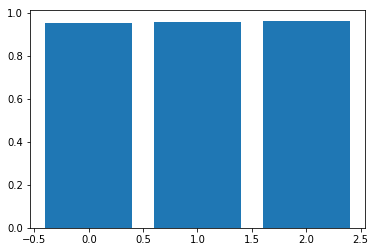

In [123]:
x = np.arange(3)
plt.bar(x, height= accuracies, )
#plt.xticks(x+.5, ['a','b','c'])